In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense

In [178]:
df_earthquake = pd.read_csv('./datasets/earthquake.csv')

In [179]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [180]:
print('There are {} rows and {} columns in the training dataset'.
      format(df_earthquake.shape[0],df_earthquake.shape[1]))

There are 23412 rows and 21 columns in the training dataset


In [181]:
df_earthquake.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [182]:
df_earthquake.Status.value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [183]:
data_cols = ['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']

In [184]:
df_earthquake = df_earthquake[data_cols]

In [185]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [186]:
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[0], df_earthquake.Date.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[1], df_earthquake.Time.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[2], df_earthquake.Latitude.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[3], df_earthquake.Longitude.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[4], df_earthquake.Depth.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[5], df_earthquake.Magnitude.isna().sum()))

missing values of "Date" : 0 cases 
missing values of "Time" : 0 cases 
missing values of "Latitude" : 0 cases 
missing values of "Longitude" : 0 cases 
missing values of "Depth" : 0 cases 
missing values of "Magnitude" : 0 cases 


In [187]:
# missing hidden values
print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[0], len(df_earthquake[df_earthquake['Date'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[1], len(df_earthquake[df_earthquake['Time'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[2], len(df_earthquake[df_earthquake['Latitude'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[3], len(df_earthquake[df_earthquake['Longitude'] == 0])))

# it might be missing value. I am not the earthquake expert! :)
print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[4], len(df_earthquake[df_earthquake['Depth'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[5], len(df_earthquake[df_earthquake['Magnitude'] == 0])))


missing values of "Date" : 0 cases 
missing values of "Time" : 0 cases 
missing values of "Latitude" : 1 cases 
missing values of "Longitude" : 0 cases 
missing values of "Depth" : 170 cases 
missing values of "Magnitude" : 0 cases 


In [211]:
# find any duplicates
df_earthquake.duplicated().sum()

0

In [189]:
# convert date and time into timestamp
timestamps = []

for cdate, ctime in zip(df_earthquake['Date'], df_earthquake['Time']):
    
    try:
        mydatetime = datetime.datetime.strptime(cdate + ' ' + ctime, '%m/%d/%Y %H:%M:%S')
        timestamps.append(time.mktime(mydatetime.timetuple()))
        
    except ValueError:
        timestamps.append('Error')
        print('Error')
        
timeStamps = pd.Series(timestamps)
df_earthquake['Timestamp'] = timeStamps.values

Error
Error
Error


In [190]:
# to get rid of the errors! we had 3 errors .. we could fix them though ..
error_indexs = df_earthquake[df_earthquake['Timestamp'] == 'Error'].index
df_earthquake.drop(error_indexs, inplace=True)

In [191]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,-1.57609e+08
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,-1.57444e+08
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,-1.57334e+08
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,-1.57072e+08
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,-1.57005e+08


In [192]:
# visualization

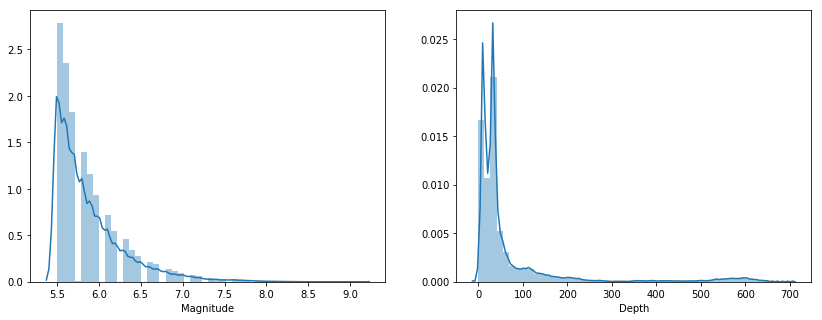

In [193]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.distplot(df_earthquake['Magnitude'], ax=ax[0])
sns.distplot(df_earthquake['Depth'], ax=ax[1])
plt.show();

In [194]:
# create the random forest regsressor model

In [195]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print('Shape of X,y train: {} {}'.format(X_train.shape, y_train.shape))
    print('Shape of X,y test: {} {}'.format(X_test.shape, y_test.shape))
    return X_train, X_test, y_train, y_test

X = df_earthquake[['Timestamp', 'Latitude', 'Longitude']]
y = df_earthquake[['Magnitude', 'Depth']]
X_train, X_test, y_train, y_test = split_data(X, y)

Shape of X,y train: (17556, 3) (17556, 2)
Shape of X,y test: (5853, 3) (5853, 2)


In [196]:
def create_model(X_train, y_train):
    
    # n_estimators is the number of trees in the forest
    rfr = RandomForestRegressor(random_state=42, n_estimators=100)
    rfr.fit(X_train, y_train)
    
    pred_test = rfr.predict(X_test)
    
    return rfr.score(X_test, y_test)
    
score = create_model(X_train, y_train) 
print('Score of the random forest regressor model :', score)

Score of the random forest regressor model : 0.8758647370064446


In [197]:
parameters = {'n_estimators':[10, 20, 50, 60 ,100]}

grid = GridSearchCV(rfr, parameters, cv=5)
grid_fit = grid.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_

pred_y = best_fit.predict(X_test)

best_fit.score(X_test, y_test)

0.8758647370064446

In [198]:
best_fit

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [199]:
predicted = pd.DataFrame(pred_y)

In [200]:
predicted.shape

(5853, 2)

In [201]:
X_test.shape

(5853, 3)

In [202]:
predicted.head()

,0,1
0,5.878,45.0860
1,5.882,34.3338
2,6.005,41.1390
3,5.731,20.6722
4,5.821,10.0600


In [203]:
y_test.head()

,Magnitude,Depth
13121,5.5,74.3
17921,6.3,26.0
3419,5.6,33.0
20803,5.8,16.0
15057,5.5,10.0


In [204]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(3,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='squared_hinge', metrics=['accuracy'])

In [205]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_48 (Dense)             (None, 30)                120       
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 62        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


In [206]:
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 17556 samples, validate on 5853 samples
Epoch 1/10
17556/17556 [==============================] - 3s 162us/step - loss: 0.0039 - acc: 0.0799 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 2/10
17556/17556 [==============================] - 2s 130us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 3/10
17556/17556 [==============================] - 2s 134us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 4/10
17556/17556 [==============================] - 3s 155us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 5/10
17556/17556 [==============================] - 3s 144us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 6/10
17556/17556 [==============================] - 2s 132us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - val_acc: 0.0767
Epoch 7/10
17556/17556 [==============================] - 3s 152us/step - loss: 0.0039 - acc: 0.0819 - val_loss: 0.0035 - v

In [207]:
model.predict(X_test)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [208]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

5853/5853 [==============================] - 0s 18us/step
Evaluation result on Test Data : Loss = 0.0035033316239931026, accuracy = 0.07671279685504005
